<a href="https://colab.research.google.com/github/saitros/100days-commit-project/blob/master/Vision/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
import json
import matplotlib.pyplot as plt
from PIL import ImageColor
import numpy as np

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
drive.mount('/content/drive')
FOLDER = '/content/drive/My Drive/Colab Notebooks/GAN_Study'
os.chdir(FOLDER)
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/Colab Notebooks/GAN_Study'

In [0]:
class Preprocess_color_mnist:
    def __init__ (self):
        self.color_dict = {}
        self.num_tag = {}

        f_color = open('./data/color_palette.json', encoding='UTF-8')
        color_p = json.loads(f_color.read())
        for color in list(color_p.keys())[2:]:
            self.color_dict[color] = list(ImageColor.getrgb(color_p[color][3]))
        self.num_tag =  { 0 : 'zero', 1 : 'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six', 7:'seven', 8:'eight', 9:'nine'}
        self.load_mnist()

    def load_mnist(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()
    
    def gray_to_rgb(self, img):
        return np.stack([img, img, img], axis=-1)

    def paint_mnist(self, img):
        color = list(self.color_dict.keys())[np.random.randint(0, len(self.color_dict))]

        for pic_row in range(img.shape[0]):
            for pic_col in range(img.shape[1]):
                if np.any(img[pic_row][pic_col] != 0):
                    img[pic_row][pic_col] = self.color_dict[color]

        return img, color

    def show_example(self, number=5):
        
        for data, label in zip(self.x_train[:number], self.y_train[:number]):
            data = self.gray_to_rgb(data)
            paint_data, color = self.paint_mnist(data)
            plt.imshow(paint_data)
            print(color, self.num_tag[label])
            plt.pause(0.5)

    def main(self, number=10000):
        for data, label in zip(self.x_train[:number], self.y_train[:number]):
            data = self.gray_to_rgb(data)
            paint_data, color = self.paint_mnist(data)

        '''
        save title : color + tag
        save data : painted mnist
        
        '''


In [0]:
p = Preprocess_color_mnist()

gray five


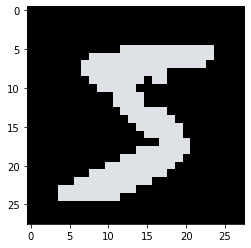

green zero


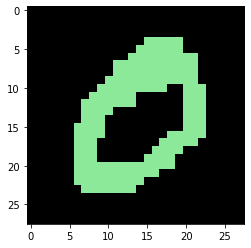

KeyboardInterrupt: ignored

In [0]:
p.show_example()